The Machine Learner Within
===============

As Scientists you may be familiar with Machine Learning before. If you have played with some sort of function fitting then you have seen some aspect of Machine Learning(ML).

It is the current HOT topic, and it looks good on your resume. People think its alchemy and some people have very strong opinions about it.
But I am going to show you how you can use it in your daily life (or scientific career).

### MACHINE LEARNING, WHAT IS? ###

Machine learning is a glorified way of finding a function iteratively. (Basically, Newton's method, on steroids).
These functions need not be something analytic nor should look like any standard function you think of when you hear the word function.

ML is useful for forecasting, finding patterns, function fitting, classifying and plenty more.

#### Machine Learning usually goes in the following steps: ####
1. What is your problem?
2. Getting and preparing your data
3. Try out different algorithms
4. Evaluate your results
5. Improve your results
6. Start all over again
7. ???
8. Profit


Today, we will go through the above steps (Till 4) and solve a problem.
But before we do that



The following is what is required of your computer. You can pip install all of these.
* scipy (for scientific libraries)
* numpy (for number crunching)
* matplotlib (for fun plots)
* pandas (for manipulating data tables)
* sklearn (for already preconcocted ML algorithms)

Once your libraries are installed and data downloaded;
open up a fresh, nice and shiny jupyter notebook.

In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

STEP 1: WHAT'S YOUR PROBLEM?
================

A lot of times new questions appear once you start playing around with the datasets. Other times you start off with a question and collect your data. In our case we will go with the latter.

A machine learning question is usually 
* Predict what the next data point is going to be (regression, prediction)
* What class does my data fall into (classification)
* I have all this data puked at me, figure out what groups with what (clustering/unsupervised learning)
* I want to replace my annoying co-worker/student with code (Deep Learning)

We will be dealing with classification problem today. 

### If all of us present here were to go aboard on the titanic. How many of us would survive? ###

STEP 2: GETTING AND PREPARING YOUR DATA
======================

Once you identified your problem, in our case our titanic survival scenario, you collect data. You could solve this problem either by simulation, or consider all passengers to have boarded the titanic and see whether there is a pattern that emerges that tells you your chance of survival.

The model itself captures this pattern. **It need not be a pattern that you can see with your eyes and clearly make sense off**. Many times the pattern is so weirdly mixed with the parameters that the model does feel like a black box.

It is very important to take some data out and keep it aside, so that you know that the model is actually learning a pattern and not just memorizing every value. This "kept on the side data" is called **_test data_**

The data that the model actually sees and finds pattern/function from is called **_training data_**

I keep a ratio of 80:20. 80% of data goes into finding a pattern and 20% goes into testing.

Thankfully, all titanic data is cleaned, differentiated into test and train and given to us by Kaggle. Get your data here:
https://www.kaggle.com/c/titanic/data

Make sure you unpack your data in the same folder as your Jupyter Notebook.



In [3]:
#Load the dataset

train_dat = pd.read_csv("train.csv")
train_dat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


SibS? Parch? Embarked? What do these columns mean? The meaning about the data presented to you is called **Metadata** and is very crucial in all of datascience. The kaggle link above will tell you more information about your data so that you can make important decisions such as 
*What columns to remove?, What values to clean (remove any NaN values)?, etc.*

You can come up with more.

Let's remove Ticket numbers, PassengerId, maybe that won't be helpful in providing any pattern information

In [4]:
del train_dat['Ticket']
del train_dat['Cabin']
del train_dat['PassengerId']
train_dat

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


Let's try and see any correlations between any of the variables we see here. Seeing connections and correlations is a **very important** aspect of understanding your data. Before you can fit any model/do any of the meaty machine learning, you need to understand your data very well. That way you can make the best use of it.

So, let's take a look at the variables and how they affects survivability.

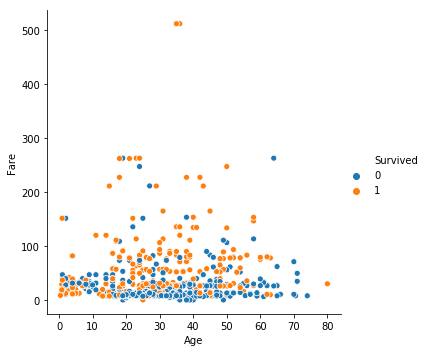

In [5]:
#Age and Survivability
sns.relplot(x="Age",y="Fare", hue="Survived", data=train_dat)
plt.show()

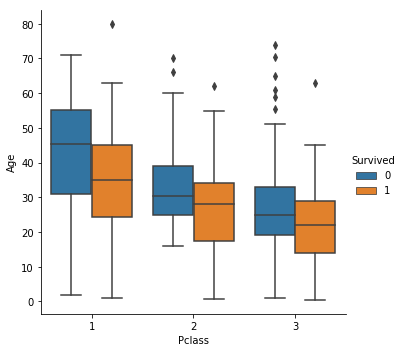

In [6]:
sns.catplot(x="Pclass",y="Age", hue="Survived", data=train_dat, kind="box")
plt.show()

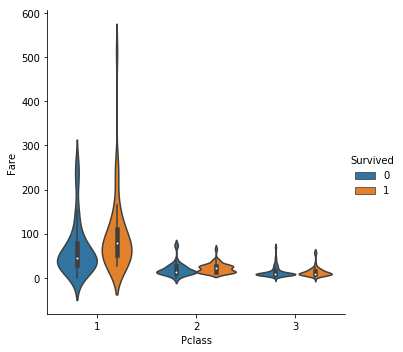

In [7]:
sns.catplot(x="Pclass",y="Fare", hue="Survived", data=train_dat, kind="violin")
plt.show()

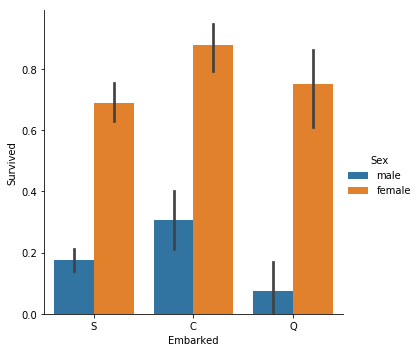

In [8]:
sns.catplot(y="Survived",x="Embarked", hue="Sex", data=train_dat, kind="bar")
plt.show()

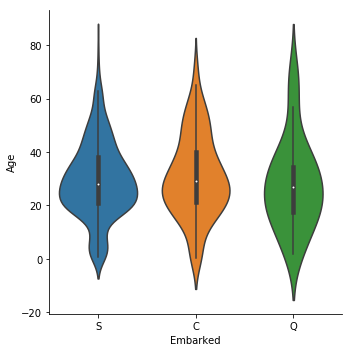

In [9]:
sns.catplot(y="Age",x="Embarked", data=train_dat, kind="violin")
plt.show()

Along with plotting we can use some pandas functions to get mean,median,variance and other statistical information of each parameter using a pandas function called `describe`.

In [31]:
train_dat.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Look at the Age variable. There is something fishy. The count of the Age variable is just 714, telling us about missing values. Thus we need to clean them. 

But first let's make a copy of the main dataset (never manipulate or change original copy). So I will separate out the `Survived` column.

In [11]:
X_ = train_dat.iloc[:,1:]
del X_["Name"] #Name not interesting for classification problem
Y_ = train_dat["Survived"]

## Preprocessing your data for classifier ## 

We have NaN values in Age and Embarked columns. Let's look at the age variable 

From the dataset we need to fill the age variable. 
We can either randomly add an age.

But, we can make use of all the information we have from other records. Why don't we use that to fill our Age value.

The first step is to look at the correlations between age and other variables. Then see which ones are most correlated.

In [12]:
#Look at correlations between Age and other variables
#Use the awesome corr function! 
print("Correlation for Age with Fare is ", X_["Age"].corr(X_["Fare"]))
print("Correlation for Age with Pclass is ", X_["Age"].corr(X_["Pclass"]))
print("Correlation for Age with SibSp is ", X_["Age"].corr(X_["SibSp"]))
print("Correlation for Age with Parch is ", X_["Age"].corr(X_["Parch"]))
print("Correlation for Age with Sex is ", X_["Age"].corr(X_["Sex"]))

('Correlation for Age with Fare is ', 0.09606669176903887)
('Correlation for Age with Pclass is ', -0.36922601531551724)
('Correlation for Age with SibSp is ', -0.30824675892365644)
('Correlation for Age with Parch is ', -0.18911926263203513)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

** ERROR! **. Why did this happen? That is because we need to set the `Sex` variable to a numeric type. So a good way usually people represent binary objects is just with 0 and 1.

If you have more than one but discrete number of classes, (such as names in a dictionary, or diffrent embarking routes then we use one-hot encoding.

So, in the case of `Embarked` in our dataset, we have 3 unique values: *S,C & Q*. They are represented as:
* S = [001]
* C = [010]
* Q = [100]


Basically any 3 linearly independent vectors. So if you have N classes use N linearly independent vectors. But your number of columns increases by that much (N-1). So can make your data sparser. 

But we are not going to use the hotvector formalism right now, we will do it before feeding it to the algorithms.

In [13]:
#Changing Sex to 0 and 1
X_["Sex"] = X_["Sex"].map({"female": 0, "male": 1})
X_

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S
5,3,1,NaN,0,0,8.4583,Q
6,1,1,54.0,0,0,51.8625,S
7,3,1,2.0,3,1,21.0750,S
8,3,0,27.0,0,2,11.1333,S
9,2,0,14.0,1,0,30.0708,C


In [14]:
#Now we can print out correlation w.r.t Sex
print("Correlation for Age with Sex is ", X_["Age"].corr(X_["Sex"]))

('Correlation for Age with Sex is ', 0.09325357685567734)


`Age` and `Embarked` are the ones that require some filling. Sometimes it is useful to discard certain rows when they don't help. Let's look at the values of `Embarked` that are null.

In [15]:
#This will tell you all the rows that are null
train_dat[train_dat["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


Only ** TWO ROWS **. Not worth trying to come up with a model to try and fill these values. Let's just throw em out!! 

In [16]:
#Throw out the two Null values! REMEMBER TO THROW THEM OUT FROM THE SEPARATED Y_
X_ = X_.dropna(subset=["Embarked"])
Y_ = train_dat[~train_dat["Embarked"].isnull()]["Survived"]

#Since we removed stuff we need to update the row indices
X_ = X_.reset_index(drop=True)
Y_ = Y_.reset_index(drop=True)

Time to replace empty `Age` values.
`Age` can be replaced with the statistical median of the most correlated values. Here I will use `Pclass` and `SibSp` and `Embarked` to feed in values for missing `Age`. An example shown below

In [17]:
#Let's take a particular combinaiton of SibSp, Pclass and Embarked, in this case
sub = ((X_["SibSp"] == 0) & (X_["Pclass"] == 1) & (X_["Embarked"]== "S"))
X_[sub]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
6,1,1,54.0,0,0,51.8625,S
11,1,0,58.0,0,0,26.5500,S
23,1,1,28.0,0,0,35.5000,S
55,1,1,NaN,0,0,35.5000,S
82,1,1,28.0,0,0,47.1000,S
101,1,1,21.0,0,1,77.2875,S
109,1,1,47.0,0,0,52.0000,S
123,1,1,54.0,0,1,77.2875,S
135,1,0,19.0,0,2,26.2833,S
165,1,0,NaN,0,1,55.0000,S


In [18]:
#The NaN's above you see will be replaced by the median value as below 
X_[sub]["Age"].median()

38.5

We will create a lookup table that will contain all the median values of all possible combinations. This way we can quickly fill as we go down the rows filling NaN values from the table.
So

### Step 1: Create a lookup table ###

In [19]:
#Let's look at the different values of each column
print(X_["SibSp"].unique())
print(X_["Pclass"].unique())
print(X_["Embarked"].unique())

[1 0 3 4 2 5 8]
[3 1 2]
['S' 'C' 'Q']


In [20]:
#Find the median statistical predictions
guess_lookup_table = np.zeros((9,4,3)) #As SibSp goes uptill 8, Pclass goes uptill 3 and we only have 3 ports
for i in X_["SibSp"].unique():
    for j in range(4):
        for k,port in enumerate(X_["Embarked"].unique()):
            subset= ((X_["SibSp"]==i) & (X_["Pclass"]==j) & (X_["Embarked"]==port))
            age_guess =  X_[subset]["Age"].median()
            if np.isnan(age_guess):
                #Try a smaller subset removing the least correlated value
                new_sub = ((X_["SibSp"]==i) & (X_["Pclass"]==j))
                age_guess = X_[new_sub]["Age"].median()
                if np.isnan(age_guess):
                    #Try only the highest correlated value 
                    new_new_sub = (X_["Pclass"]==j)
                    age_guess = X_[new_new_sub]["Age"].median()
                    
            
            guess_lookup_table[i,j,k] = age_guess

guess_lookup_table

array([[[  nan,   nan,   nan],
        [38.5 , 36.  , 36.  ],
        [30.  , 23.  , 43.5 ],
        [26.  , 24.5 , 23.5 ]],

       [[  nan,   nan,   nan],
        [36.  , 40.  , 33.  ],
        [29.  , 27.5 , 29.  ],
        [26.  , 15.  , 36.  ]],

       [[  nan,   nan,   nan],
        [51.5 , 19.5 , 44.  ],
        [23.5 , 23.5 , 23.5 ],
        [24.  ,  0.75, 19.5 ]],

       [[  nan,   nan,   nan],
        [23.  , 23.  , 23.  ],
        [30.  , 30.  , 30.  ],
        [ 6.  ,  6.  ,  6.  ]],

       [[  nan,   nan,   nan],
        [37.  , 37.  , 37.  ],
        [29.  , 29.  , 29.  ],
        [ 6.5 ,  6.5 ,  5.5 ]],

       [[  nan,   nan,   nan],
        [37.  , 37.  , 37.  ],
        [29.  , 29.  , 29.  ],
        [11.  , 11.  , 11.  ]],

       [[ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ]],

       [[ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0

### Step 2: Loop through all NaN values and fill them one by one from table ###

In [21]:
#Create a dictionary that matches ports to index values
portDict = {port:ix for ix,port in enumerate(X_["Embarked"].unique())}
#Loop through all dataitems where Age is NaN and fill them from the lookup table
for idx,row in X_[X_["Age"].isnull()].iterrows():
    i = row["SibSp"]
    j = row["Pclass"]
    k = portDict[row["Embarked"]]
    X_.loc[idx,"Age"] = guess_lookup_table[i,j,k]
    
X_

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S
5,3,1,23.5,0,0,8.4583,Q
6,1,1,54.0,0,0,51.8625,S
7,3,1,2.0,3,1,21.0750,S
8,3,0,27.0,0,2,11.1333,S
9,2,0,14.0,1,0,30.0708,C


In [22]:
#Final Check!!
X_[X_["Age"].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [23]:
X_.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,0.649044,29.102272,0.524184,0.382452,32.096681
std,0.834700,0.477538,13.377168,1.103705,0.806761,49.697504
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


STEP 3: ALGORITHM TIME
=============

Now we know some information about our data, and we have cleaned our dataset we could move onto writing/using algorithms that'll be useful in finding said patterns. We can see some patterns above, such as those who paid more survived (and higher the class the higher your survival chance), also in each class if the mean age of survival was younger than the mean age of people who died.

Our machine learning models will help us capture these patterns.

The models we shall use would be:
* Decision Tree (if else model)
* Guassian Naive Bayes (probabilistic model)
* Support Vector Machines (Classify with lines)

We will try and compare how well these do.

** Note: Each classifier takes in input very differently. So you have to arrange and prepare your data in a way that your classifier can eat it. **

In [25]:
#So let's come back to changing into "Embarked" into a hotvector, expanding our space
cnvrtd = X_["Embarked"].map({"S": np.array([0,0,1]),"C": np.array([0,1,0]), "Q": np.array([1,0,0])})
extended_df = pd.DataFrame(cnvrtd.values.tolist(),columns=["PortQ","PortC","PortS"])
X_ = pd.concat([X_,extended_df],axis=1)
X_ = X_.drop(["Embarked"],axis=1)
X_.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,PortQ,PortC,PortS,PortQ,PortC,PortS
0,3,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,0,1,0,0,1,0
2,3,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1,0,0,1


In [ ]:
X_.head()

### A. DECISION TREE ###

A decision tree is like a if-else tree. You make one in your head when you deciding food from a menu. It is a simple model. It is prone to overfitting, and thus the height/depth of the tree should be kept in check. 

The way the algorithm builds the tree is it first calculates which is the most informative feature (to the problem) and keeps that as head/top of the tree, then recursively builds down trying to keep the most informative features near the top.

More info:

https://www.dummies.com/programming/big-data/data-science/how-to-use-predictive-analysis-decision-trees-to-predict-the-future/

https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1

### B. Guassian Naive Bayes ###

This is a probabilistic model. So from high school probability try and remember [Bayes Rule][https://en.wikipedia.org/wiki/Bayes%27_theorem]. We are trying to predict Survivability-- i.e what is the probability that survivability = 1 given the seven other parameters we presented. Using Bayes rule we try to solve it.

Naive Bayes assumes that each feature is **conditionally independent** of one another. The occurance of one does not affect the occurrence of another.

More info:
https://en.wikipedia.org/wiki/Naive_Bayes_classifier

### C. Support Vector Machines ###

In a nutshell support vector machines tries to draw the best straight line between two distributions thus classifying the region into 2: over the fence or behind the fence.

For non linear problems you change the space and go to a particular space that will make the problem linear. This is known as kernal trick.

More info:
https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

In [26]:
#To feed stuff into our different algorithms it's important to look at our datatypes
print(X_.dtypes)
print(Y_.dtypes)

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
PortQ       int64
PortC       int64
PortS       int64
PortQ       int64
PortC       int64
PortS       int64
dtype: object
int64


But this is all our training data. To test we would have to use the kaggle data and push it to their server to get the answer. You want to test in your own machine. You don't use the autograder to check when your code is right now do you? 

So we will use an important tool called **Cross Validation.**

Also we will need a Validation set. It is a test set from the training data to help us interpret how well the models are doing.

In [27]:
from sklearn import model_selection
#20% of the dataset will be kept aside for validation
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_, Y_, test_size=validation_size, random_state=420)

### Cross Validation ###
A common type of cross validation is k-fold cross validation. I use a 5-fold cross validation in many of my problems. 

Here we split our data into 5 components. The model is trained on 4 of the said components and tested on one. This is done 5 times where each component gets to have a chance to be a test set.

The results are averaged and presented. 

Big ups to https://machinelearningmastery.com/machine-learning-in-python-step-by-step/ where I found a simple template for all your model evaluations.

In [28]:
#Load the models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTree

models = [("420Trees",DTree()), ("NaiveBaes", GaussianNB()), ("SVM",SVC())]

for name,model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=420)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    print("{} : Accuracy = {}. Std = {}".format(name,cv_results.mean(),cv_results.std()))

420Trees : Accuracy = 0.773584162317. Std = 0.0421921261394
NaiveBaes : Accuracy = 0.759539052497. Std = 0.0339552493684
SVM : Accuracy = 0.727085590466. Std = 0.0417243301268


STEP 4: EVALUATE YOUR RESULTS
=================

Here is where your validation set will come in handy! We see that NaiveBayes does the best job among the three though decision trees coming a very close 2nd.

We will now predict the values in our validation set and test our accuracy.

For this we will use two new sklearn commands

In [29]:
#Import the two new commands
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#For decision Tree
Treeclf = DTree()
Treeclf.fit(X_train,Y_train)
predictionT = Treeclf.predict(X_validation)
print(accuracy_score(Y_validation, predictionT))
print(classification_report(Y_validation, predictionT))

0.7078651685393258
             precision    recall  f1-score   support

          0       0.80      0.74      0.77       116
          1       0.57      0.65      0.61        62

avg / total       0.72      0.71      0.71       178



In [30]:
#For NaiveBaes
NBay = GaussianNB()
NBay.fit(X_train,Y_train)
predictionNB = NBay.predict(X_validation)
print(accuracy_score(Y_validation, predictionNB))
print(classification_report(Y_validation, predictionNB))

0.7359550561797753
             precision    recall  f1-score   support

          0       0.84      0.73      0.78       116
          1       0.60      0.74      0.66        62

avg / total       0.76      0.74      0.74       178



STEP 5: IMPROVE YOUR RESULTS!!
=================

We have two or three classifiers, they could learn from each other or they could work together and help improve results. 


This part is called **ENSEMBLE TECHNIQUES**.

There are a few common ensemble techiniques:
* Bagging (You basically average together the answers by multiple classifiers)
* Boosting (Iteratively make weak learners strong by changing the weights of misclassified results)
* Stacking (GO META! Use the outputs of base classifiers to train a better model)

We don't have time today, BUT

### Now it is YOUR TURN, improve this base classification and post it to kaggle and let us know! ###

Sometimes you have to go to **Step 6: Do it all over again** , group ages into different groups, normalize fares, try extracting something out of name/cabin/something we dropped. I hope I have shown you how the data science process looks like. I hope I could present you some of the challenges people face when doing data science/machine learning.

I might extend this and show some ensemble techiniques in the future, so keep watching this space!!
